<a href="https://colab.research.google.com/github/felipeeanjos/CampMarketing/blob/main/RegMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score as r2

In [2]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


In [3]:
df = pd.read_csv('MKT.csv')

In [55]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [8]:
#verificando dados nulos e tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [9]:
#distruibuição dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


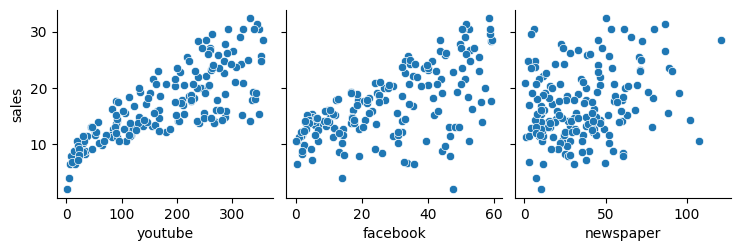

In [12]:
#correlação das variáveis explicativas com a variável Y
sns.pairplot(df, x_vars = ['youtube','facebook','newspaper'], y_vars = 'sales')

<Axes: >

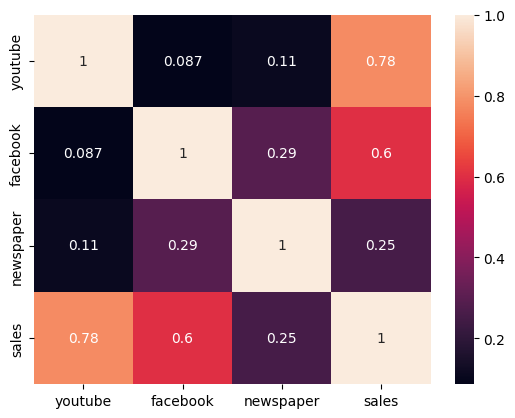

In [13]:
#correlação das variáveis a partir de um heatmap
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='sales', ylabel='Count'>

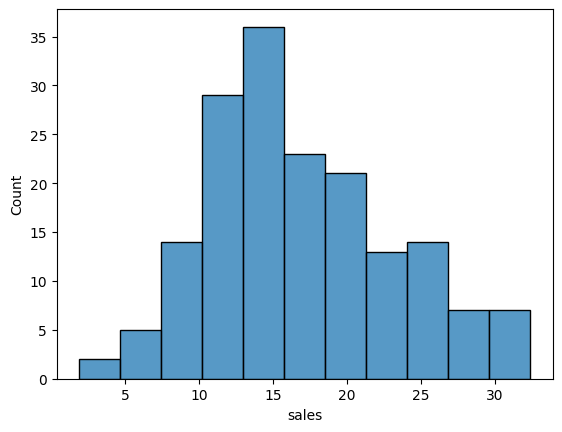

In [20]:
#distribuição da variável explicativa
sns.histplot(df['sales'])

<Axes: >

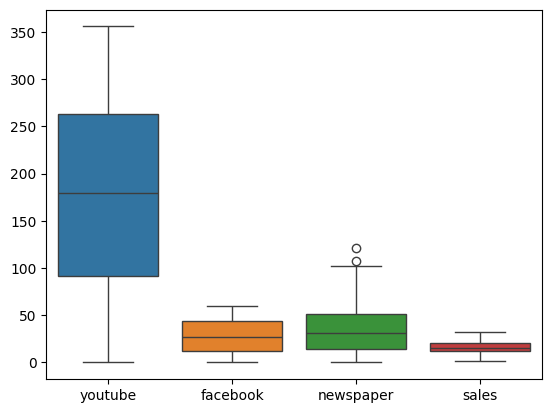

In [25]:
#distribuição dos dados por quartis e verificação de outliers
sns.boxplot(df)

# MODELING TECHNIQUES
1. Regressão Linear do SKTLEARN
2. Decision Tree Regression do SKLEARN

# MODELING ASSUMPTIONS
Apenas variáveis numéricas

# TEST DESIGN
Dataset split:
Separação de train/test dataset padrão com 80% treino e 20% para teste via método SKLEARN

# MÉTRICA DE AVALIAÇÃO DO MODELO:
R² do SKLEARN, varia de 0 a 1, onde mais próximo de 1 indica melhor capacidade do modelo em explicar a variabilidade dos dados <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html>


In [27]:
#definindo variáveis x , e y
x = df[['youtube','facebook','newspaper']]
y = df['sales']

In [28]:
#separando em treino e teste
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=7)

Técnica 1. Regressão Linear do SKTLEARN <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

In [31]:
reg = LR().fit(X_train, y_train)

In [32]:
y_reg = reg.predict(X_test)

In [35]:
r2_reg = r2(y_test,y_reg)
print('R² da regressão linear do SKTLEARN é:',r2_reg)

R² da regressão linear do SKTLEARN é: 0.8781978721399106


Técnica 2. Decision Tree Regression do SKLEARN <https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>

In [37]:
reg_2 = DTR().fit(X_train,y_train)

In [38]:
y_reg2 = reg_2.predict(X_test)

In [39]:
r2_reg2 = r2(y_test,y_reg2)
print('R² da Decision Tree Regression do SKLEARN é:',r2_reg2)

R² da Decision Tree Regression do SKLEARN é: 0.95802413612173


Chegamos ao modelo de predição 2, Decision Tree Regression do SKLEARN, poderíamos excluir a coluna 'newspaper' do df, por apresentar baixa correlação com a variável explicativa, e o modelo apresentar maior R² sem ela, porém vamos presumir que por se tratar de uma variável que pelo describe, recebe mais investimento do que o facebook, é algo importante para a empresa investir parte em newspaper, e vamos sugerir um menor investimento, mas não vamos extinguir do modelo.

In [54]:
#média de valor dos investimentos realizados
df[['newspaper','facebook','youtube']].mean().sum()

240.93263157894734

In [62]:
#Definindo os valores para cada coluna
data = {
    'youtube': [100,100,100,100,110,120,130],
    'facebook': [100,110,120,130,100,100,100],
    'newspaper': [40,30,20,10,30,20,10],
}

# Criando o DataFrame
df2 = pd.DataFrame(data)

In [63]:
y_pred = reg_2.predict(df2)

In [65]:
df2['y_pred'] = y_pred

In [83]:
df2.head(7)

,youtube,facebook,newspaper,y_pred
0,100,100,40,17.52
1,100,110,30,17.52
2,100,120,20,17.52
3,100,130,10,17.52
4,110,100,30,17.52
5,120,100,20,17.52
6,130,100,10,20.04


<Axes: >

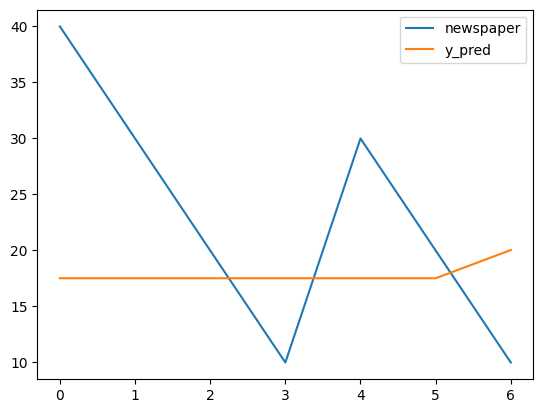

In [72]:
df2[['newspaper','y_pred']].plot()

<Axes: >

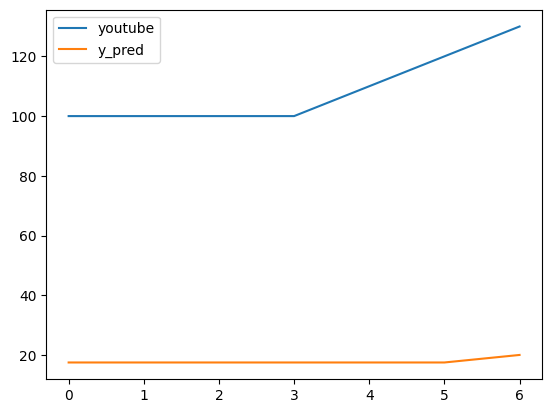

In [73]:
df2[['youtube','y_pred']].plot()

<Axes: >

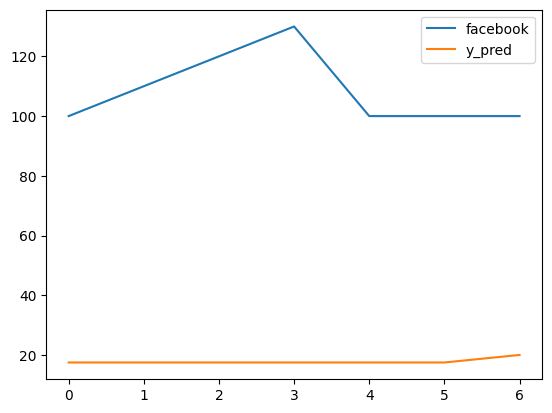

In [75]:
df2[['facebook','y_pred']].plot()

In [87]:
df2[df2['newspaper'] == 10]

,youtube,facebook,newspaper,y_pred
3,100,130,10,17.52
6,130,100,10,20.04


# CONSIDERAÇÕES FINAIS:

A média dos valores realizados é de 240.93, então vamos selecionar valores que somados, fiquem nesse valor de 240. A melhor combiação foi: Youtube = 130, facebook = 100 e newspaper = 10, tendo o maior Sales, que foi: 20,04.

Algo que reforça nossa correlação estudada anteriormente, onde youtube é o que tem maior correlação e o newspaper menor. Esses 3 gráficos nos deram esse melhor entendimento, pois podemos observar newspaper = 10 duas vezes, mas somente uma das vezes teve aumento em Sales, que ao observamos os demais gráficos vemos que é exatamente pela questão de dar maior ênfase ao youtube.

Sendo assim, achamos valores que podem ajudar na tomada de decisão de onde investir em publicidade para alcançar um maior retorno, visto que a média de retorno como visto no describe é de 16,92 nossos valores performaram melhor. Esse é um projeto inicial e vamos nos aprofundar mais em apresentar melhores números.